<a href="https://colab.research.google.com/github/schrodingrskat/data319/blob/main/DATA319_Final_Project_Shared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Kate's version to include the write-up -- will need datasets in repo to knit w/o showing code I think***

Also need to know if first cell is unnecessry.

Do we want to include who did what? I want to make sure Tiana and Lacey get the credit they deserve.

Project ToDo from DATA 319 Final Group Project

First, a correlation matrix for all of the numerical columns in the dataset should be constructed and analyzed, with any interesting or surprising features discussed in the report.

Second, at least three of the columns should be selected for comparison with a multivariate normal distribution. The selected columns should be tested for normality and you should construct a similarly-sized set of points from a multivariate normal distribution with parameters µ and Σ matched to those of the chosen columns. Your observations comparing the actual data to the synthetic points should also be included in the report.

Methodology: Are (at least) two multivariate methods specified and applied correctly? Is the normality testing and synthetic data comparison performed correctly? -Multivariate normal modeling and Principal Component Analysis.

Analysis: Are the methods that we used to analyze the data appropriate and carried out correctly? Is the analysis thorough and logically conducted?

Conclusions: Do the final conclusions provide satisfactory answers to the stated questions? Are the conclusions supported by the analysis that was performed and presented?

---



# Top 10 US Companies Stock Market Analysis

Authors: Lacey Shivers, Matt Blecharz, Tiana Noll-Walker, Kate Prophet

WSU Data 319 Fall 2023 Final Project

December 10, 2023





# Introduction

We developed an analysis of stock prices of the top ten American businesses, including Apple, Amazon, Berkshire Hathaway, Facebook, Google, Johnson & Johnson, Mastercard, Microsoft, Visa, and Walmart. End-of-day stock data over the span of twenty years was pulled from Amazon Marketplace, from "20 Years of End-of-Day Stock Data for Top 10 US Companies by Market Cab" by Alpha Vantage, linked below. The daily stock value data spans between January 1, 2000 and September 1, 2020, and includes both raw numbers and adjusted closing numbers. The adjusted close values account for splits and dividend distributions.

We are specifically interested a few key things -- the first of which being, what correlations, if any, may exist across the stocks of different companies. The analysis of correlation matrices has the potential to reveal relationships between different features within a dataset. This could help for understanding how the stock market values impact each company's daily numbers. Price movements can be evaluated to best see times of increase and drops of investments.

Secondly, we are interested in looking for trends, in order to make predictions of directionality for the stock market. Assessing these companies' stocks over time will allow for trends and patterns to be shown. Having twenty years of daily data for all ten companies gives us a large enough amount of data to establish these trends in order to predict the direction of stock prices. Since the data does not complete the year 2020, recording only up until September, we may be able to check these predictions with published findings on the stock market for the remainder of 2020 and for the years 2021-2023 in order to test model accuarcy.

Lastly, we are specifically interested in evaluating whether or not daily and/or weekly volumes show greater volatility and directionality. Daily and weekly volumes may show stronger bonds than others, along with comparing the volatility and directionality of the stocks of their respective companies.

# Correlation Matrices

In statistical analysis, correlation refers to the strength of a relationship between any two features, measured by the dependence, or the extent the two are linearly related. Correlation matricies for all ten companies were produced to detect any existing relationships between features. Scores closer to one indicate a strong relationship -- as one value rises, so does the other. Scores closer to zero indicate a weak relationship -- one value has little to no predictive ability in regards to another. Negative score indicate an inverse relationship -- as one value goes up, the other goes down. Please see below legend for plot title labels.


Key:

'AAPL' = Apple

'AMZN' = Amazon

'BRK-A' = Berkshire Hathaway

'FB' = Facebook

'GOOG' = Google

'JNJ' = Johnson & Johnson

'MA' = Mastercard

'MSFT' = Microsoft

'V' = Visa

'WMT' = Walmart

In [ ]:
# @title
### CAN WE DO WITHOUT THIS CELL?

# have to load data into files for each session
# Load each dataset (10)
Apple = pd.read_csv('daily_adjusted_AAPL.csv')
Amazon = pd.read_csv('daily_adjusted_AMZN.csv')
Berkshire = pd.read_csv('daily_adjusted_BRK-A.csv')
Facebook = pd.read_csv('daily_adjusted_FB.csv')
Google = pd.read_csv('daily_adjusted_GOOG.csv')
Johnson = pd.read_csv('daily_adjusted_JNJ.csv')
Mastercard = pd.read_csv('daily_adjusted_MA.csv')
Microsoft = pd.read_csv('daily_adjusted_MSFT.csv')
Visa = pd.read_csv('daily_adjusted_V.csv')
Walmart = pd.read_csv('daily_adjusted_WMT.csv')


<ipython-input-5-88cbc445bd98>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrices = {company: data[company].corr() for company in companies}


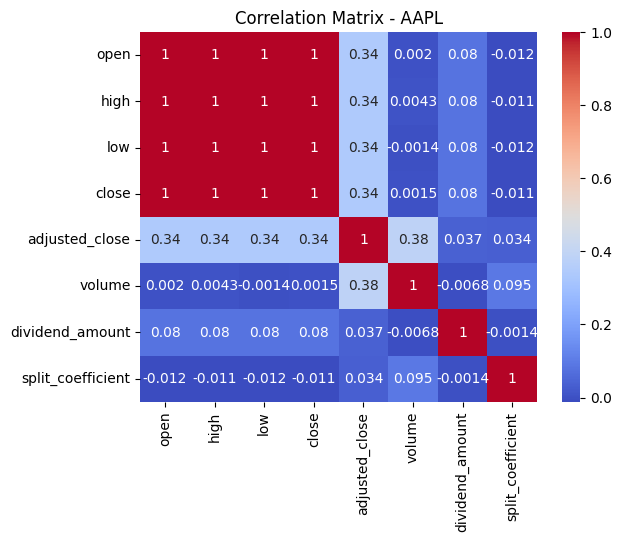

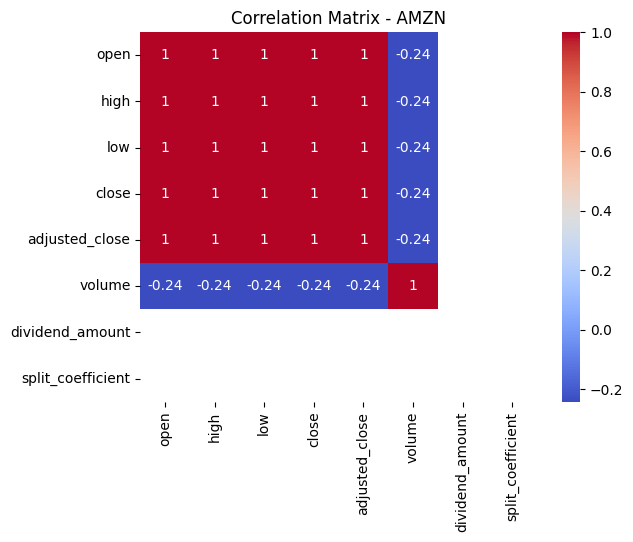

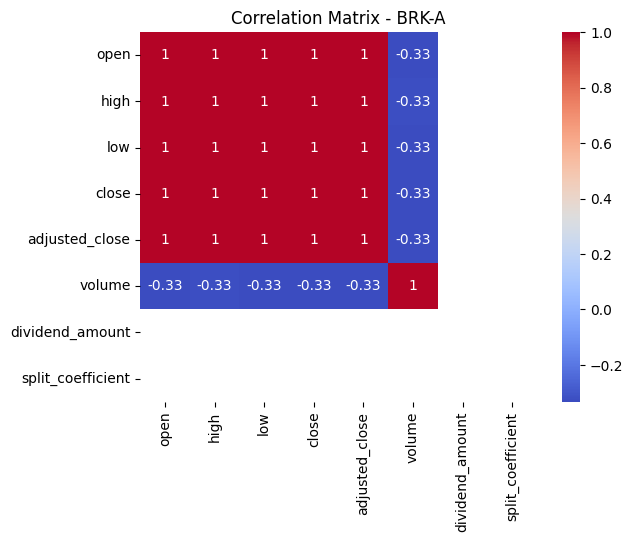

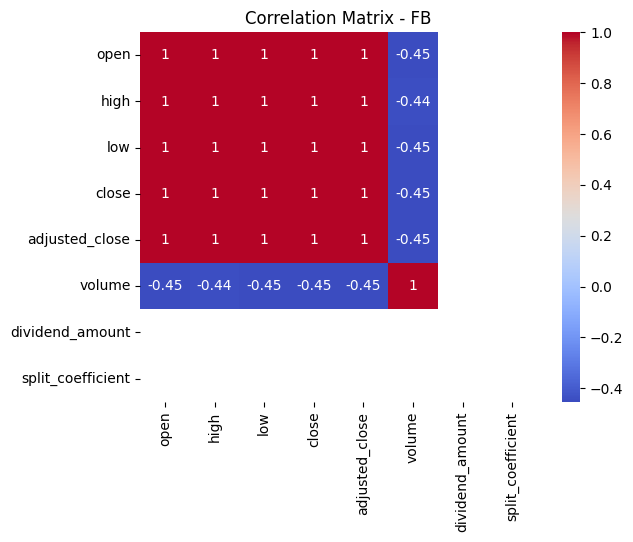

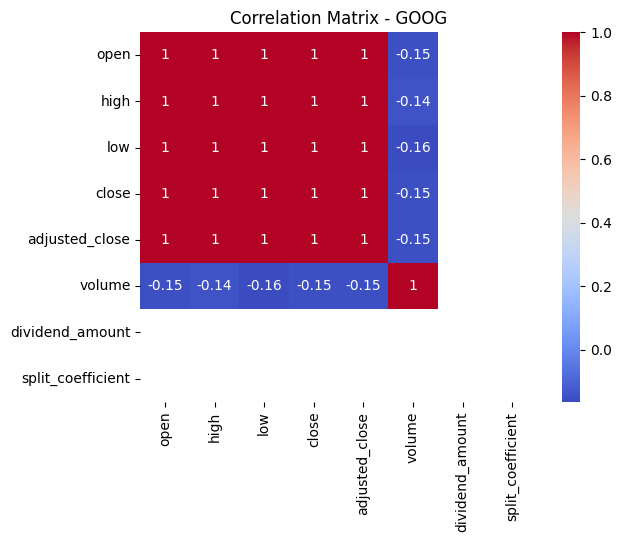

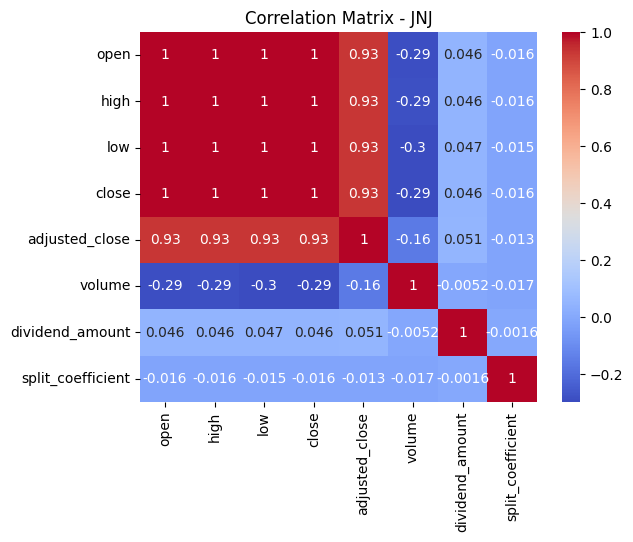

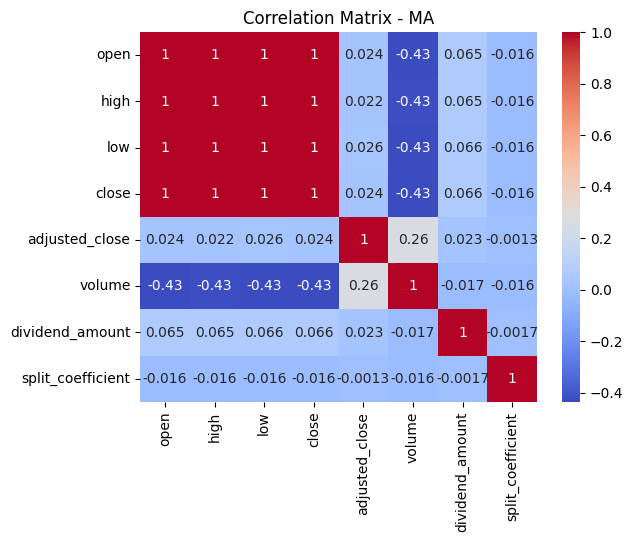

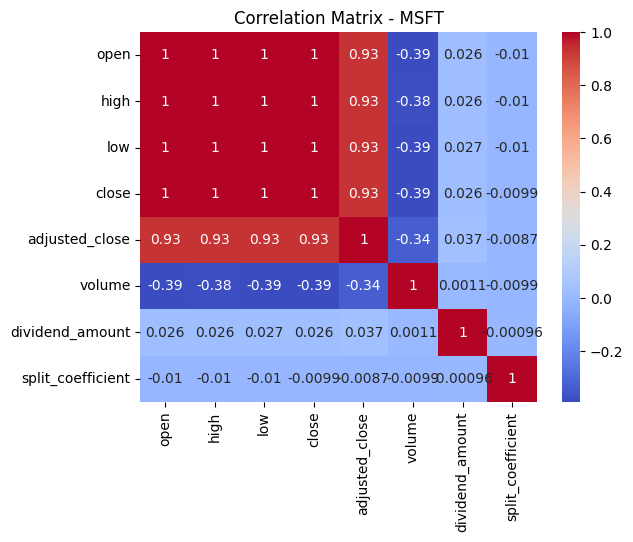

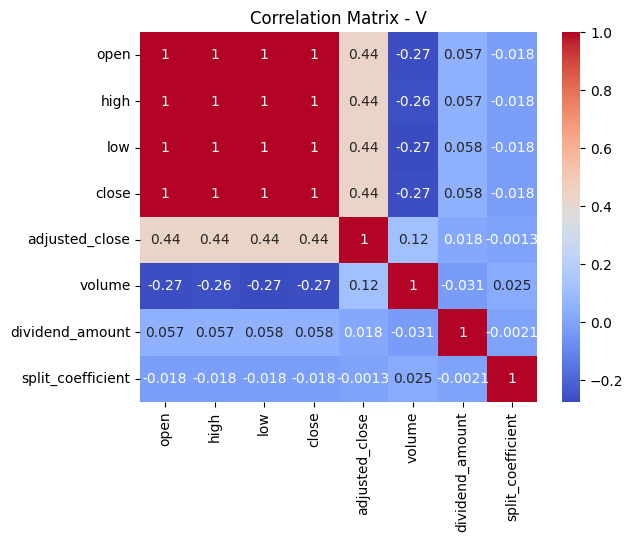

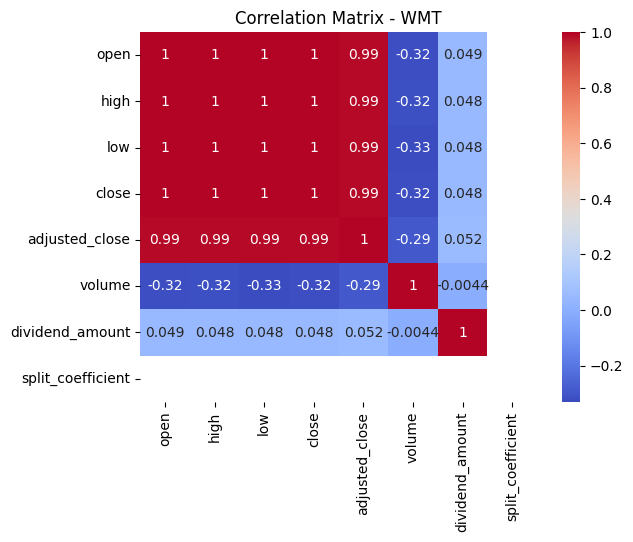

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import multivariate_normal

def load_stock_data(company_symbol):
    filename = f'daily_adjusted_{company_symbol}.csv'
    return pd.read_csv(filename)

companies = ['AAPL', 'AMZN', 'BRK-A', 'FB', 'GOOG', 'JNJ', 'MA', 'MSFT', 'V', 'WMT']

data = {company: load_stock_data(company) for company in companies}

correlation_matrices = {company: data[company].corr() for company in companies}


for company in companies:
    sns.heatmap(correlation_matrices[company], cmap='coolwarm', annot=True)
    plt.title(f'Correlation Matrix - {company}')
    plt.show()

Fig. 1: Correlation matrices are constructed for the stock data for each of the top ten US companies.

The correlation matrices follow a relatively consistent pattern between companies, with little deviation. Among all ten companies, the opening, high, low and closing prices are virtually deterministic of each other -- with correlations of 1, if one of those four values is up, it can be expected that the rest of the four would be up as well, as visa-versa. The adjusted close, on the other hand, varies between companies, whether it's still very close to 1, as it is with Walmart, or if it is much closer to 0, as is in the case of Mastercard. It would be an opportunity for further research to explore why Mastercard and Apple deviate from the rest of the companies in this respect.

Interestingly enough, volume tends to be negatively correlated with all prices. This suggests that the less stock is traded, the higher the prices will be. The inverse of this is that if more stock is traded, the lower the prices will be. This could reflect the ubiquitous advice, "Buy low, sell high." It is easier to buy when the price is low, and harder to buy when the price is high. This may explain why there is more activity when prices are lower than when they are higher.

# Multivariate Normality Testing

Multivariate normality testing was conducted using three columns for comparison with a multivariate normal distribution: opening prices, closing prices, and the volume of trades. The multivariate normal distribution was formed using syntheic data following the means and standard deviations matched to the aforementioned columns using a similar number of points.

Normality is a key assumption in many statistical analyses. Deviations from normality may impact the validity of statistical models and predictions. By conducting this test for multiple companies and columns, the analysis provides insight into the normality of stock data distributions, informing the suitability of certain statistical analyses and models.

Methods used for multivariate normality testing included the Shapiro-Wilk and the Anderson-Darling test. These tests help evaluate whether the distribution of stock data in the selected columns follows a normal distribution. The Shapiro-Wilk compares between the actual stock data and synthetic data that fits a normal distribution. The functional difference between the two types of tests is that the Shapiro-Wilk test has an advantage with smaller sample sizes, whereas the Anderson-Darling test has an advantage with larger sample sizes. Considering this has 7,200 samples for each company, and while only using three dimensions, we avoid the "curse of dimensionality" and can consider this to be a large sample size. In this case, it is expected for the Anderson-Darling test to perform the best. It also has the advantage in which it is sensitive to tails of distributions, which means it can better detect departures from normality in the tails of the distribution.

## Shapiro-Wilk Test

For each combination of company and column, the Shapiro-Wilk test is conducted. The test assesses the p-values of selected features to determine if they are moer likely to be significant than to be as lucky as random chance.

 **Print Results:**
   - The p-value for the opening prices
   - The p-value for the closing prices
   - The p-value for the volume of trades


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_multivariate.py:758: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


Shapiro-Wilk Test for open in AAPL: p-value = 0.0
Shapiro-Wilk Test for close in AAPL: p-value = 0.0
Shapiro-Wilk Test for volume in AAPL: p-value = 0.0


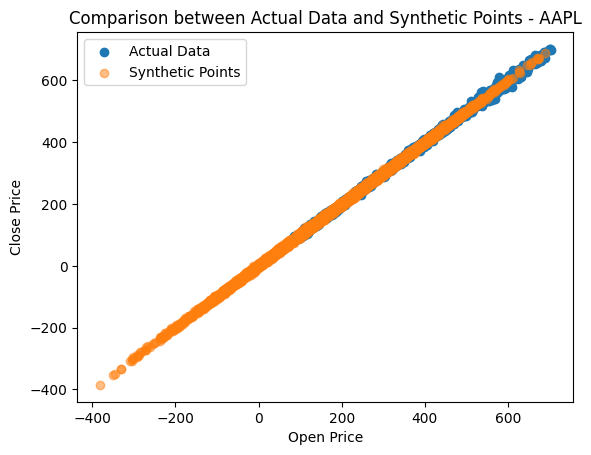

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for open in AMZN: p-value = 0.0
Shapiro-Wilk Test for close in AMZN: p-value = 0.0
Shapiro-Wilk Test for volume in AMZN: p-value = 0.0


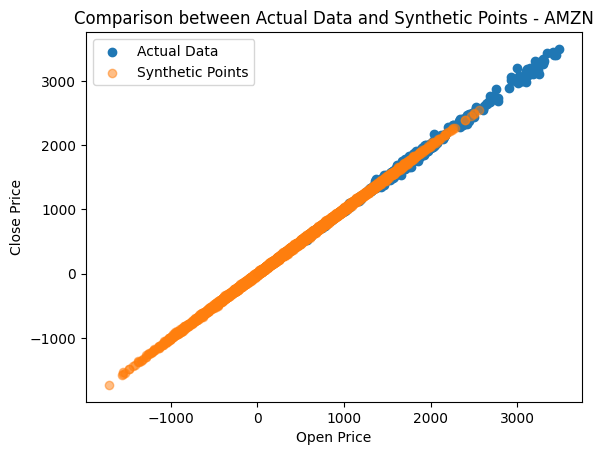

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for open in BRK-A: p-value = 0.0
Shapiro-Wilk Test for close in BRK-A: p-value = 0.0
Shapiro-Wilk Test for volume in BRK-A: p-value = 0.0


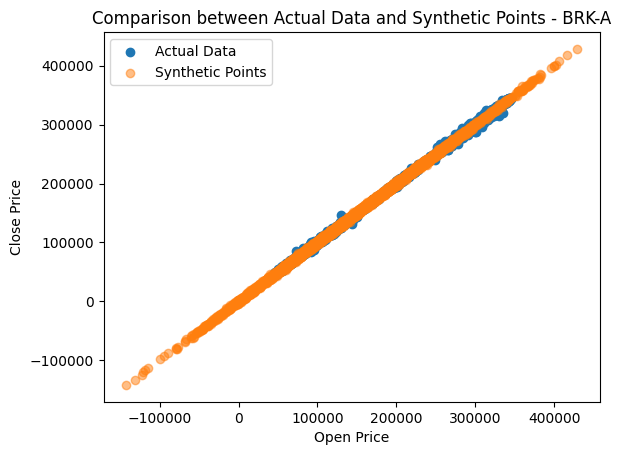

Shapiro-Wilk Test for open in FB: p-value = 1.2404106460541271e-23
Shapiro-Wilk Test for close in FB: p-value = 1.528091730995311e-23
Shapiro-Wilk Test for volume in FB: p-value = 0.0


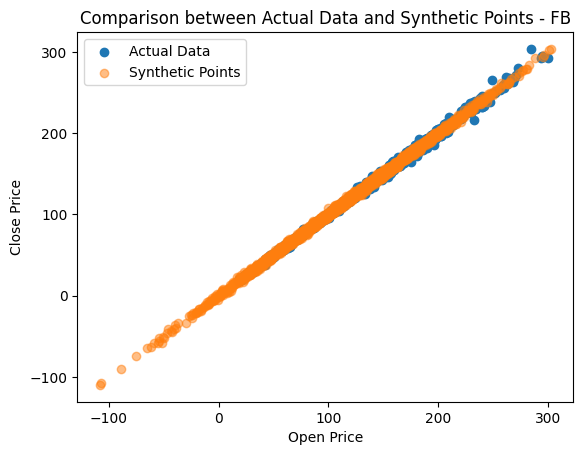

Shapiro-Wilk Test for open in GOOG: p-value = 1.2871523901824635e-23
Shapiro-Wilk Test for close in GOOG: p-value = 1.4433513459233836e-23
Shapiro-Wilk Test for volume in GOOG: p-value = 4.579443381413502e-42


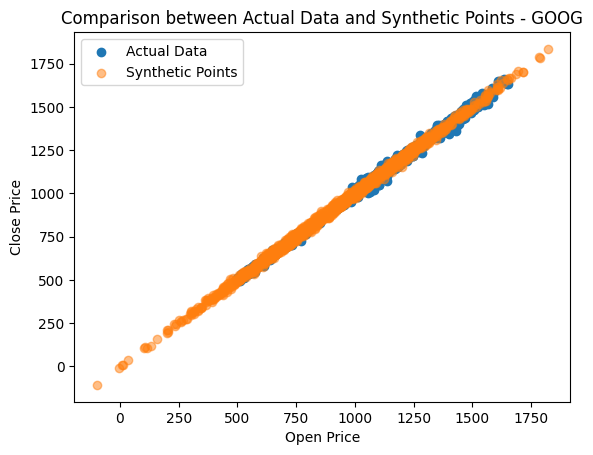

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for open in JNJ: p-value = 0.0
Shapiro-Wilk Test for close in JNJ: p-value = 0.0
Shapiro-Wilk Test for volume in JNJ: p-value = 0.0


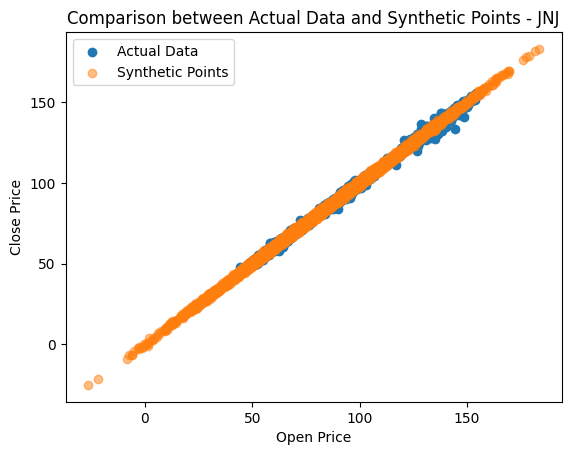

Shapiro-Wilk Test for open in MA: p-value = 0.0
Shapiro-Wilk Test for close in MA: p-value = 0.0
Shapiro-Wilk Test for volume in MA: p-value = 0.0


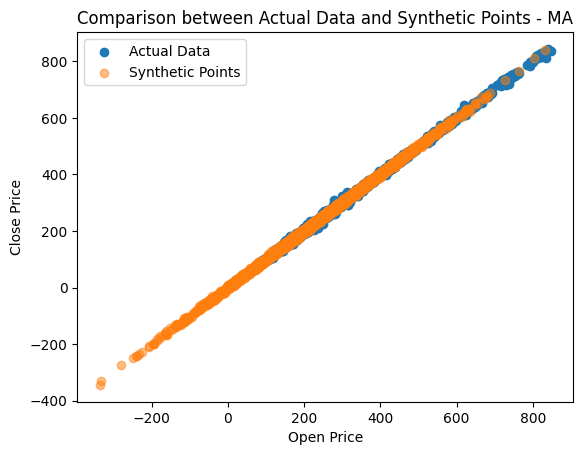

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for open in MSFT: p-value = 0.0
Shapiro-Wilk Test for close in MSFT: p-value = 0.0
Shapiro-Wilk Test for volume in MSFT: p-value = 0.0


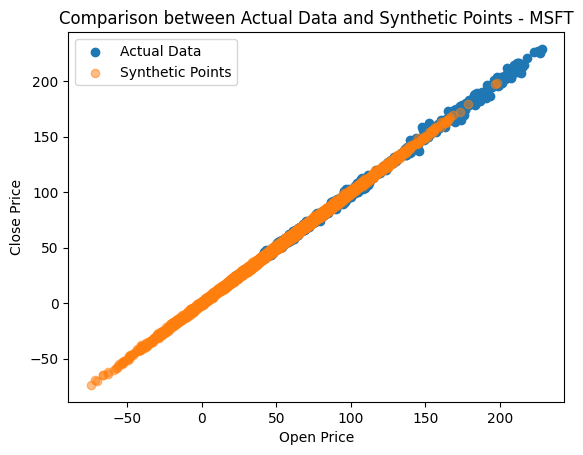

Shapiro-Wilk Test for open in V: p-value = 2.8501009465902454e-41
Shapiro-Wilk Test for close in V: p-value = 2.735614862054908e-41
Shapiro-Wilk Test for volume in V: p-value = 0.0


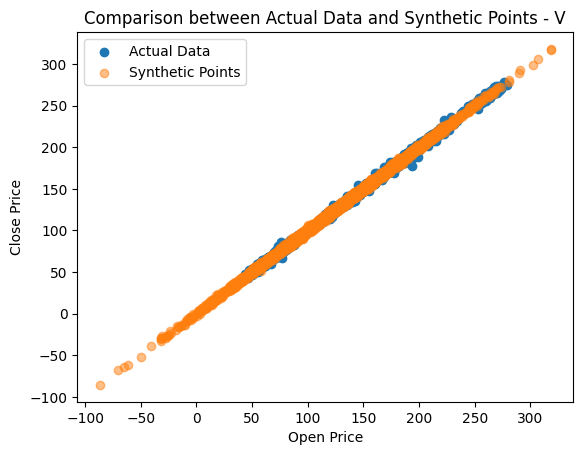

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for open in WMT: p-value = 0.0
Shapiro-Wilk Test for close in WMT: p-value = 0.0
Shapiro-Wilk Test for volume in WMT: p-value = 0.0


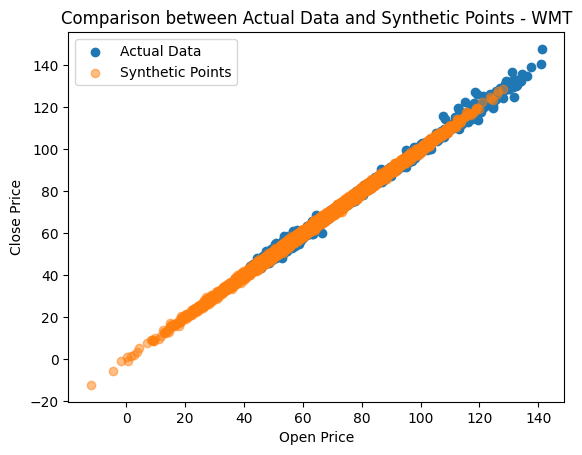

In [ ]:
from scipy.stats import multivariate_normal, shapiro

# Multivariate Normal Modeling and Normality Testing for all companies
selected_columns = ['open', 'close', 'volume']

for company in companies:
    selected_data = data[company][selected_columns]

    # test for normality using Shapiro-Wilk
    for column in selected_columns:
        stat, p_value = shapiro(selected_data[column])
        print(f"Shapiro-Wilk Test for {column} in {company}: p-value = {p_value}")

    #fit multivariate norm distribution
    mu = selected_data.mean()
    cov_matrix = selected_data.cov()
    multivariate_dist = multivariate_normal(mu, cov_matrix,allow_singular=True)


    synthetic_points = multivariate_dist.rvs(size=len(selected_data))

    #compare actual data to synthetic points
    plt.scatter(selected_data['open'], selected_data['close'], label='Actual Data')
    plt.scatter(synthetic_points[:, 0], synthetic_points[:, 1], label='Synthetic Points', alpha=0.5)
    plt.xlabel('Open Price')
    plt.ylabel('Close Price')
    plt.legend()
    plt.title(f'Comparison between Actual Data and Synthetic Points - {company}')
    plt.show()

Fig. 2: Plots comparing actual data with synthetic data points from a multivariate normal distribution in order to assess if the stock data follows a normal distribution.

The p-values found in the Shapiro-Wilk test presented as either zero, or otherwise astronomically tiny. A small p-value means that there is stronger evidence in favor of the alternative hypothesis, which in this case is that the opening price strongly influences the closing price.

The actual prices were plotted against synthetic values forming a normal distribution. They line up pretty perfectly, strongly suggesting the stock price data follows a normal distribution. This is reflected across the board, for all selected companies. However, the real data points tend to stay on the higher end.

## Anderson-Darling Test:

For each combination of company and column, the Anderson-Darling test is conducted. The test assesses whether the distribution of the data significantly departs from a normal distribution.

 **Print Results:**
   - The test statistic and critical values at various significance levels are printed.
   - A decision is made based on whether the test statistic is greater than the critical value at the 5% significance level.


In [ ]:
from scipy.stats import anderson

significance_level = 5.0

for company in companies:
    print(f"\nCompany: {company}")
    selected_data = data[company][selected_columns]

    for column in selected_columns:
        result = anderson(selected_data[column], dist='norm')

        print(f"Anderson-Darling Test for {column}:")
        print(f"Statistic: {result.statistic}, Critical Values: {result.critical_values}")

        # Compare the statistic to the critical values
        if result.statistic > result.critical_values[2]:
            print("Significant departure from normality at 5% level")
        else:
            print("No significant departure from normality at 5% level")



Company: AAPL
Anderson-Darling Test for open:
Statistic: 266.0079680953186, Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significant departure from normality at 5% level
Anderson-Darling Test for close:
Statistic: 265.8497913515266, Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significant departure from normality at 5% level
Anderson-Darling Test for volume:
Statistic: 126.16086603984422, Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significant departure from normality at 5% level

Company: AMZN
Anderson-Darling Test for open:
Statistic: 661.6200627829285, Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significant departure from normality at 5% level
Anderson-Darling Test for close:
Statistic: 661.4732041514762, Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significant departure from normality at 5% level
Anderson-Darling Test for volume:
Statistic: 332.5408957096515, Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significant departure from normality at 5% level

Co

Accross the board, the Anderson-Darling test shows a significant departure from normality when set at a 5% level. For all ten companies, we reject the null hypothesis in favor of the alternative hypothesis, in that the opening prices do effect closing prices. Curiously enough, volumes of trade also reflect a significant departure from normality. This validates the earlier observations of the correlation matrices, as though volume was inversely correlated to price. It maintains there is still a strong relationship, even if it's an inverse relationship.

# Principal Component Analysis

Principal Component Analysis (PCA) is a multivariate modeling method ideal for dimension reduction. The "curse of dimensionality" applies as the number of dimensions or features of a data set grows, the number of samples necessary to train a model of it also grows, but exponentially so. Here we conduct a PCA in order to determine which componenets contribute the most to the variance of the data. This can indicate what features are the most important in determining a system's behavior.

PCA for AAPL:
Principal Component 1: Explained Variance Ratio = 0.7999
Principal Component 2: Explained Variance Ratio = 0.2000
Principal Component 3: Explained Variance Ratio = 0.0000
Principal Component 4: Explained Variance Ratio = 0.0000
Principal Component 5: Explained Variance Ratio = 0.0000
PCA for AMZN:
Principal Component 1: Explained Variance Ratio = 0.8150
Principal Component 2: Explained Variance Ratio = 0.1850
Principal Component 3: Explained Variance Ratio = 0.0000
Principal Component 4: Explained Variance Ratio = 0.0000
Principal Component 5: Explained Variance Ratio = 0.0000
PCA for BRK-A:
Principal Component 1: Explained Variance Ratio = 0.8277
Principal Component 2: Explained Variance Ratio = 0.1723
Principal Component 3: Explained Variance Ratio = 0.0000
Principal Component 4: Explained Variance Ratio = 0.0000
Principal Component 5: Explained Variance Ratio = 0.0000
PCA for FB:
Principal Component 1: Explained Variance Ratio = 0.8491
Principal Component 2: Explained 

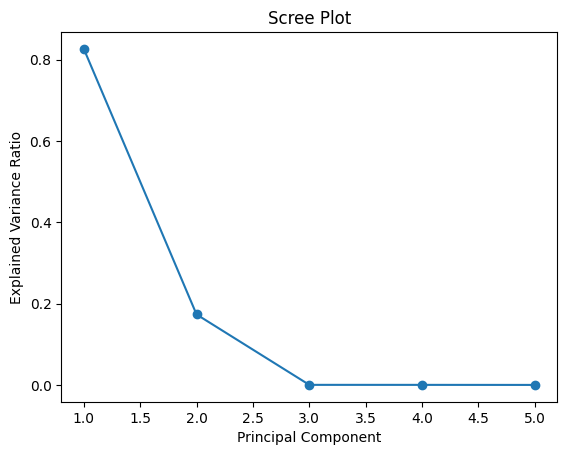

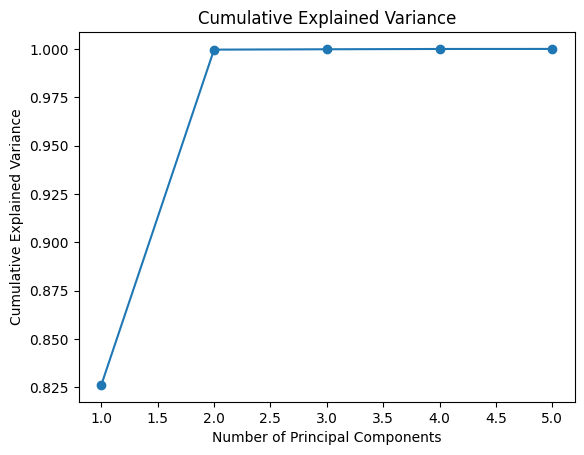

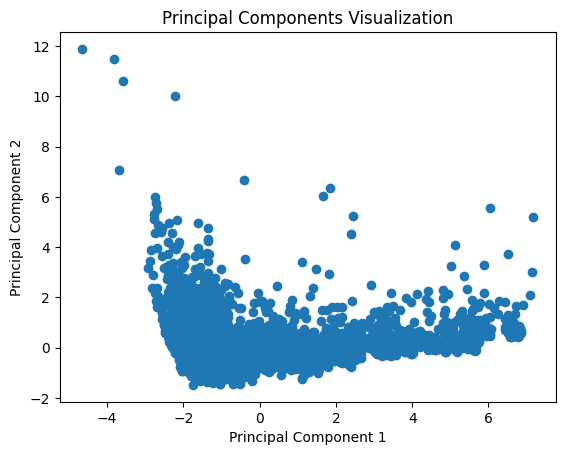

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

for company in companies:
    #get relevant columns for PCA
    columns_for_pca = ['open', 'high', 'low', 'close', 'volume']

    #standardize
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[company][columns_for_pca])

    pca = PCA()
    principal_components = pca.fit_transform(scaled_data)

    # variance explained by each principal component
    explained_variance_ratio = pca.explained_variance_ratio_

    print(f"PCA for {company}:")
    for i in range(len(explained_variance_ratio)):
        print(f"Principal Component {i + 1}: Explained Variance Ratio = {explained_variance_ratio[i]:.4f}")

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()



The scree plot indicates that the first principal component alone accounts for approximately 79.99% of the total variance in the data. As we move to additional principal componenets, the varaince decreases. The cumulative explained variance suggests that the first component captures 82.5% of the total variability.

# Mean Squared Error

The Mean Squared Error (MSE) is used to test a model of a dataset. Compared to other datasets, a low MSE means that the model very closely resembles the real data, indicating it is an accurate model. A high MSE means that the model does not resemble the real data well, indicating it is not an accurate model. Here we use MSE to evaluate our model's performance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#select features for prediction
features = ['open', 'high', 'low', 'volume']

target = 'close'

for company in companies:
    #create feature matrix (X) and target vector (y)
    X = data[company][features]
    y = data[company][target]

    #spli data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()

    #fit model on training data
    model.fit(X_train, y_train)

    #  predictions on test data
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error for {company}: {mse}')


Mean Squared Error for AAPL: 2.0987166854288377
Mean Squared Error for AMZN: 26.75036011533436
Mean Squared Error for BRK-A: 754835.6794904439
Mean Squared Error for FB: 1.03304884344987
Mean Squared Error for GOOG: 35.80396302850993
Mean Squared Error for JNJ: 0.2390160991370492
Mean Squared Error for MA: 3.3897532354468267
Mean Squared Error for MSFT: 0.2824142963023365
Mean Squared Error for V: 0.6656640706262853
Mean Squared Error for WMT: 0.17654277513266495


AAPL (Apple): MSE = 2.10
The model's predictions for Apple's closing stock prices have an average squared difference of 2.10 from the actual values. This indicates relatively good predictive performance.


AMZN (Amazon): MSE = 26.75
The model's predictions for Amazon's closing stock prices have a higher average squared difference (26.75), suggesting that the model may not perform as well for Amazon compared to Apple.

BRK-A (Berkshire Hathaway): MSE = 754,835.68
The extremely high MSE for Berkshire Hathaway indicates that the model's predictions have a significant deviation from the actual closing stock prices. This suggests that the model may not be suitable for predicting stock prices for this company.

FB (Facebook): MSE = 1.03
The model's predictions for Facebook's closing stock prices have an average squared difference of approximately 1.03 from the actual values. Similar to Apple, this indicates relatively good predictive performance.

GOOG (Alphabet/Google): MSE = 35.80
The higher MSE for Google suggests that the model may not accurately predict Google's closing stock prices.

JNJ (Johnson & Johnson): MSE = 0.24
The low MSE for Johnson & Johnson indicates that the model's predictions have a small average squared difference from the actual closing stock prices. This suggests good predictive performance.

MA (Mastercard): MSE = 3.39
The model's predictions for Mastercard's closing stock prices have an average squared difference of approximately 3.39 from the actual values. This indicates some deviation but not extreme.

MSFT (Microsoft): MSE = 0.28
The low MSE for Microsoft indicates that the model's predictions have a small average squared difference from the actual closing stock prices. This suggests good predictive performance.

V (Visa): MSE = 0.67
The model's predictions for Visa's closing stock prices have an average squared difference of approximately 0.67 from the actual values. This indicates relatively good predictive performance.

WMT (Walmart): MSE = 0.18
The low MSE for Walmart indicates that the model's predictions have a small average squared difference from the actual closing stock prices. This suggests good predictive performance.

# Support Vector Machine

Here we use a Support Vector Machine (SVM) to evaluate the Receiver Operating Characteristic (ROC) and Area Under the ROC Curve (AUC).

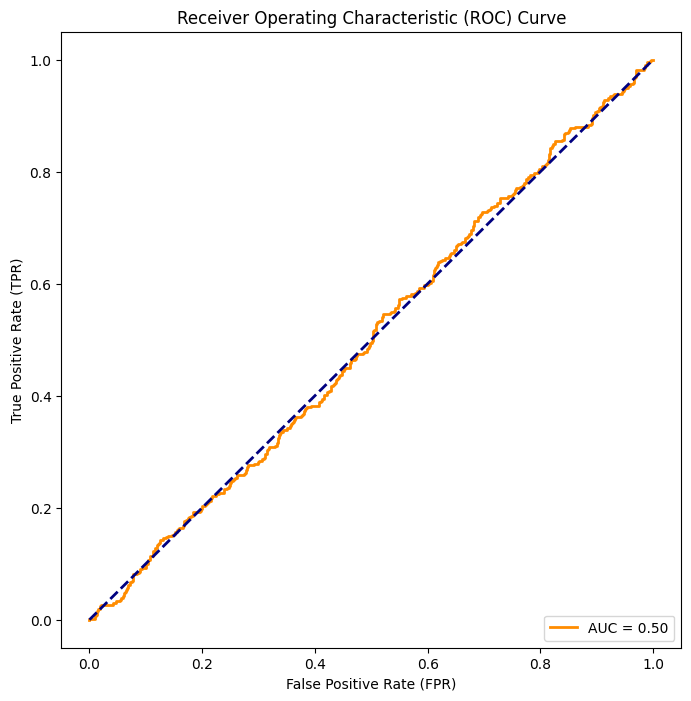

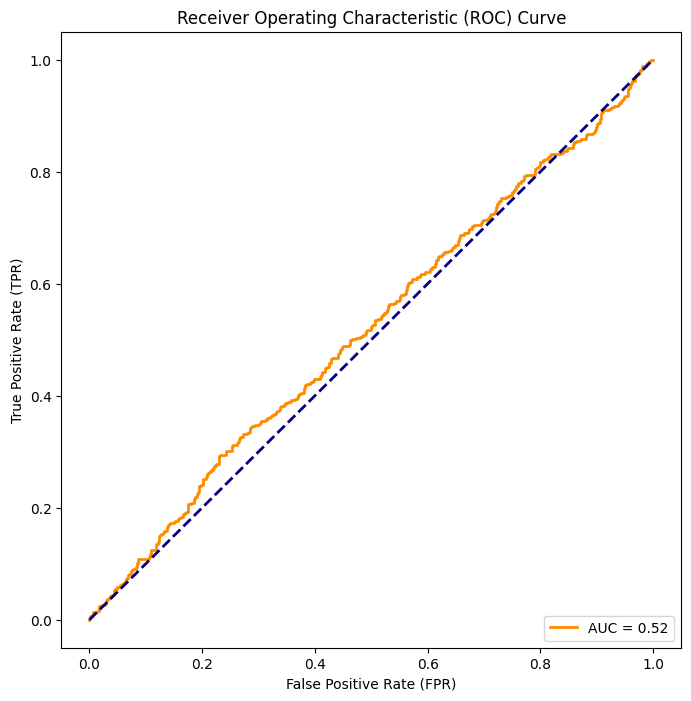

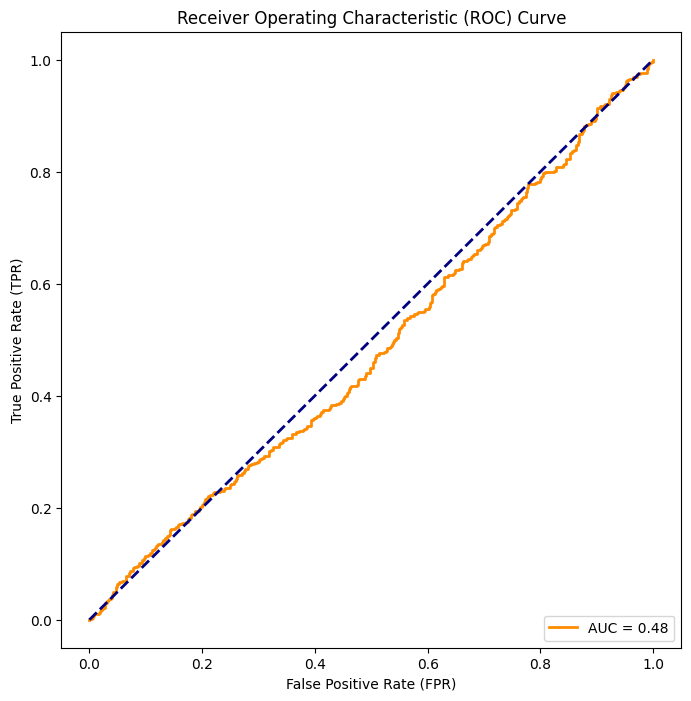

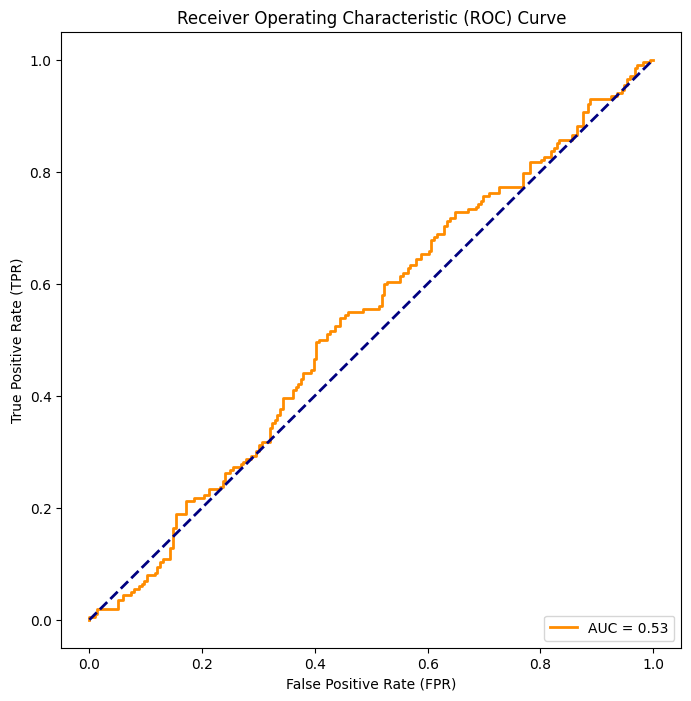

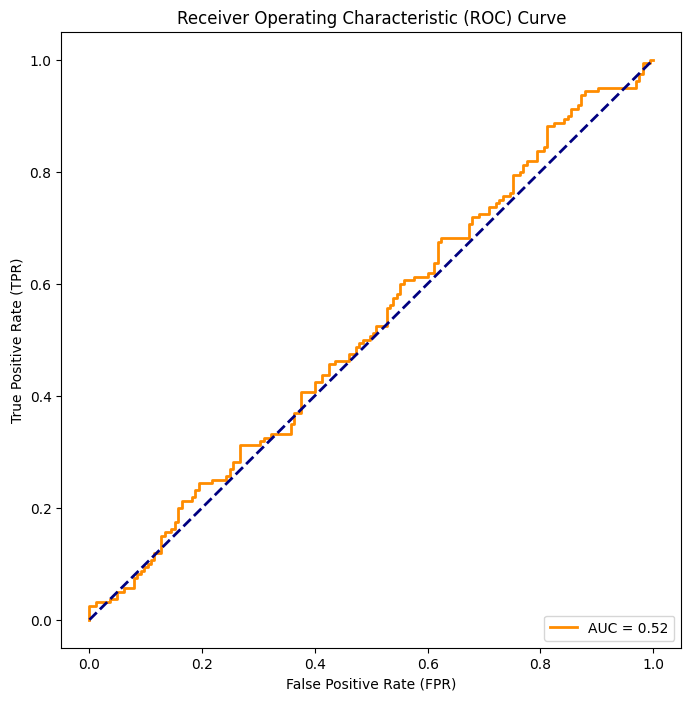

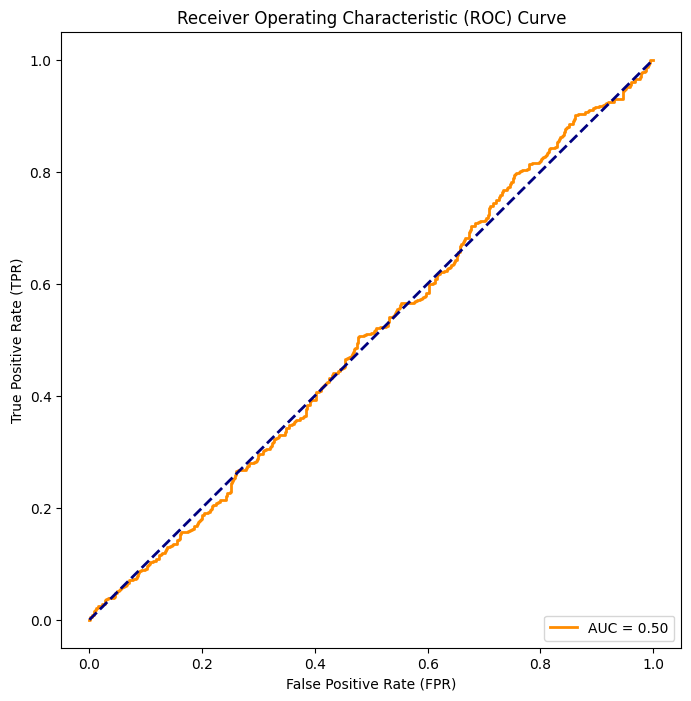

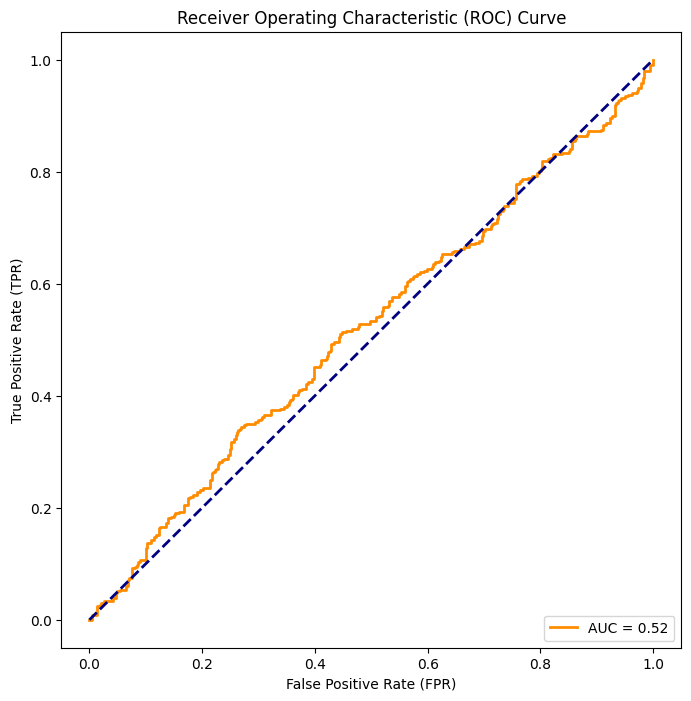

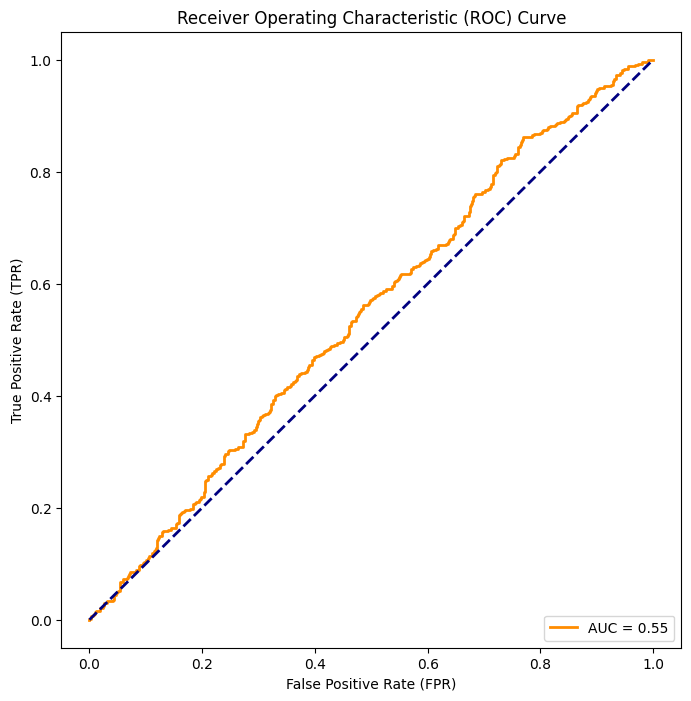

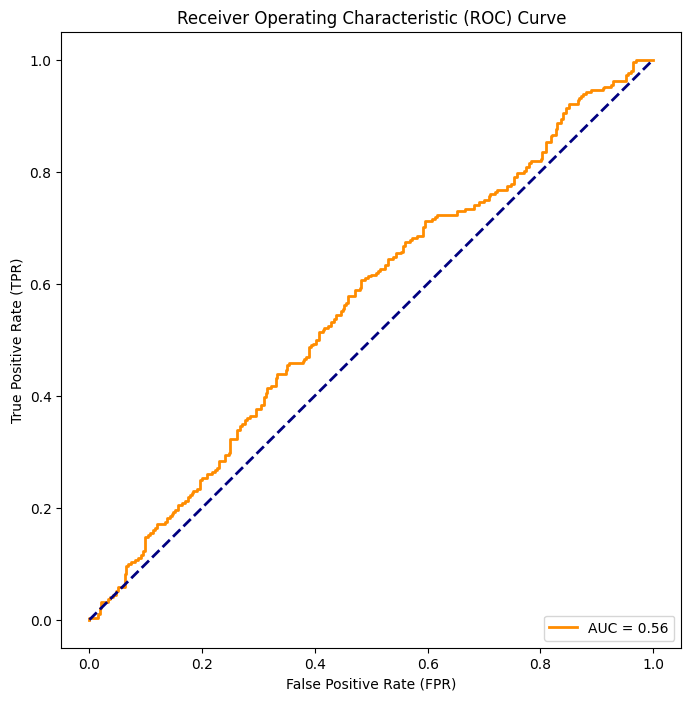

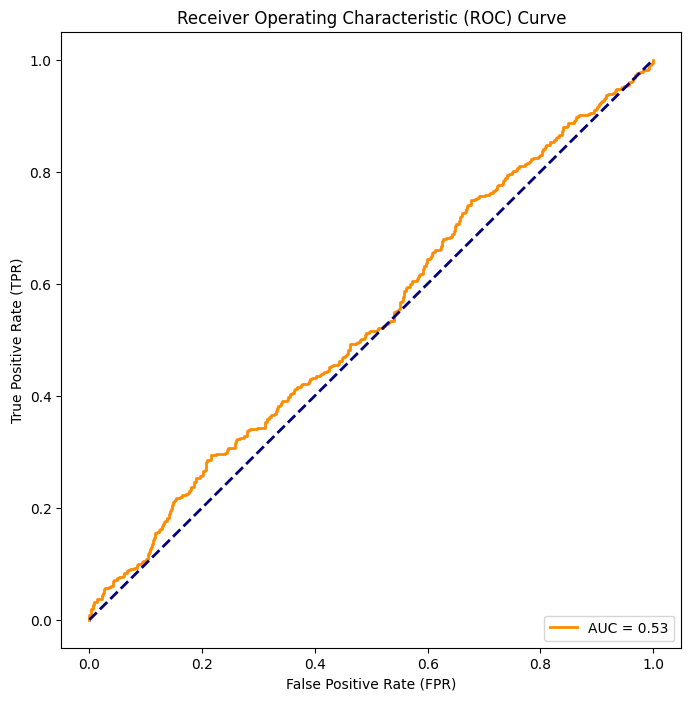

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder


features = ['open', 'close', 'high', 'low', 'adjusted_close', 'volume', 'dividend_amount', 'split_coefficient']
target = 'price_movement'

for company in companies:

  # create new column 'price_movement' based on closing prices
  data[company]['price_movement'] = data[company]['close'].diff().apply(lambda x: 'up' if x > 0 else 'down')

  X=data[company][features]
  y=data[company][target]

  y_binary = y.map({'up': 1, 'down': 0})


  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  svm_model = SVC(kernel='linear', C=1.0)
  svm_model.fit(X_train_scaled, y_train)

  label_encoder = LabelEncoder()
  y_test_binary = label_encoder.fit_transform(y_test)

  y_pred = svm_model.predict(X_test_scaled)
  y_scores = svm_model.decision_function(X_test_scaled)

# Compute ROC Curve
  fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores, pos_label=1)


# Compute Area Under the Curve (AUC)
  roc_auc = auc(fpr, tpr)

# Plot ROC Curve
  plt.figure(figsize=(8, 8))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()

The goal of our Support Vector Machine (SVM) analysis was to build a classification model that predicts the movement of stock prices (either 'up' or 'down') based on historical data. We selected relevant features, including open, close, high, low, adjusted close, volume, dividend amount, and split coefficient, to train the SVM model. The Receiver Operating Characteristic (ROC) and Area Under the ROC Curve (AUC) were used to evaluate the model's performance. The ROC curve graphically represents the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity). An AUC value close to 0.50 suggests that the model's predictive ability is no better than random chance. Our analysis revealed an AUC in the range of 0.50 to 0.55, indicating that the SVM model struggled to discriminate between 'up' and 'down' movements in stock prices. Essentially, it means that the SVM model is no better at predicting price movement than random chance.


#Conclusion

This analysis has concluded that there is not only correlation between features indeed, but that there is strong positive correlation between opening, closing, high and low prices, and inverse correlation between these four and volume traded. This indicates it can be expected for opening, closing, high and low prices to be up if any one is up, and down if any one is down, all while volume behaving in the opposite manner from price value, volume increasing as prices decrease.

Because time was not evaluated in this analysis, trends over time could not be evaluated. However, clues such as the positive correlation of the relationships between prices and inverse correlation of volume can be instrumental in predicting one value from another in real time.

Because time, on a daily or weekly basis, was not evaluated in this analysis, volatility compared between days and weeks could not be evaluated. However, as indicated by the positive correlation between the relationships of the prices, low or high, the need for predicting volatility is eschewed in the advantage of having real-time data to tell if a price is higher than the previous day.

This analysis proved to be insightful and thorough for the understanding of stock market prices for the ten most successful American companies. This information may be instrumental for those in the trading business.

##Footnotes

“ 20 Years of End-of-Day Stock Data for Top 10 US Companies
by Market Cap ” by Alpha Vantage:
https://aws.amazon.com/marketplace/pp/prodview-e2aizdzkos266?sr=0-7&ref_=beagle&applicationId=AWSMPContessa#offers